<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#model-import" data-toc-modified-id="model-import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>model import</a></span></li><li><span><a href="#analytical-solution-deduction" data-toc-modified-id="analytical-solution-deduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>analytical solution deduction</a></span></li><li><span><a href="#integration-plotting" data-toc-modified-id="integration-plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>integration plotting</a></span></li></ul></div>

# model import

In [1]:
import sys
sys.path.insert(0, '../code/')
import func
import scipy as sc
import scipy.integrate as itg
import matplotlib.pylab as p
import sympy as sp
sp.init_printing()

In [2]:
C,P,B, x, e_PR,e_P,g_P,a_P, e_BR,e_B,g_B,m_B = sp.var('C,P,B, x, e_PR,e_P,g_P,a_P, e_BR,e_B,g_B,m_B', positive=True)
dC = g_P*e_PR*(1-e_P)*P + a_P*P**2 + g_B*(e_BR*(1-e_B)-1)*C*B + m_B*B -x*C
dP = g_P*e_PR*e_P*P - a_P*P**2
dB = g_B*e_BR*e_B*C*B - m_B*B

# analytical solution deduction

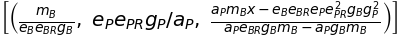

In [3]:
sp.solve([sp.Eq(dC,0),sp.Eq(dP,0),sp.Eq(dB,0)],[C,P,B])

In [4]:
vAr = (.1,.5,.63,.3,.1,.6,.55,2,.14)
x = vAr[0]
ePR = vAr[1]; eP = vAr[2]; gP = vAr[3]; aP = vAr[4]
eBR = vAr[5]; eB = vAr[6]; gB = vAr[7]; mB = vAr[8]
eQ = sc.array([mB/(eB*eBR*gB),eP*ePR*gP/aP,(aP*mB*x-eB*eBR*eP*gB*(ePR*gP)**2)/(aP*gB*mB*(eBR-1))])
eQ

array([0.21212121, 0.945     , 0.7103125 ])

# integration plotting

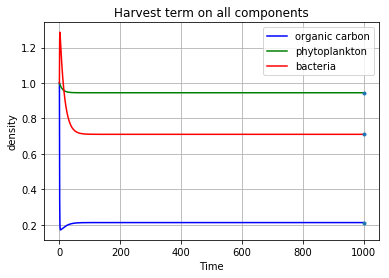

In [5]:
t = sc.linspace(0,1000,10000)
den, infodict = itg.odeint(func.ebc7, sc.array([1,1,1]), t, full_output=True, args=vAr)
p.plot(t,den[:,0], 'b-', label='organic carbon')
p.plot(t,den[:,1], 'g-', label='phytoplankton')
p.plot(t,den[:,2], 'r-', label='bacteria')
p.plot([t[len(t)-1],t[len(t)-1],t[len(t)-1]],eQ, '.')
p.grid()
p.legend(loc='best')
p.xlabel('Time')
p.ylabel('density')
p.title('Harvest term on all components')
p.show()